# Digitizing Loan Approvals for Financial Inclusion: A Machine Learning Approach for Kenyan Microfinance Institutions (MFI's) and Digital Lenders

## Problem Statement

Kenya’s financial landscape is rapidly evolving, with microfinance institutions and digital banking both playing pivotal roles in expanding access to financial services. MFIs have historically bridged the gap left by traditional banks, providing small, accessible loans to underserved communities, women, and small businesses groups often overlooked by mainstream banks. However, MFIs face challenges such as high interest rates, slow manual processes, and limited digital transformation.

Meanwhile, digital banking is driven by high mobile penetration and platforms like M-Pesa, Loop, and Branch. It offers instant, AI-driven loan approvals, lower operational costs, and seamless integration with mobile money. Yet, digital banking also faces challenges, including data privacy, cybersecurity risks, and limited reach in remote areas without smartphones.

This project aims to build a machine learning classification model that predicts whether a loan application should be approved (loan_status: Approved/Not Approved). The solution will help MFIs and digital lenders automate approvals, improve decision fairness, and streamline operations, supporting the shift toward a hybrid, inclusive, and efficient financial ecosystem in Kenya.

## Business Understanding

**Stakeholders:** Microfinance institutions, digital lenders, mobile banks, applicants (especially women, small businesses, and rural communities), fintech investors, and regulators.

**Context and Value Proposition:**

- **MFIs:** Continue to be a lifeline for the unbanked and small businesses, but must digitize to remain competitive. Digitization can reduce bureaucratic delays, lower costs, and expand reach.
- **Digital Lenders:** Offer instant, AI-based approvals and lower fees, but must address data privacy, cybersecurity, and inclusion for non-smartphone users.
- **Applicants:** Benefit from faster, fairer, and more accessible credit, especially women and rural entrepreneurs who have historically been underserved.
- **Regulators:** Are evolving policies to ensure responsible lending and consumer protection as digital banking grows.

**Industry Trends and Opportunities:**

- The future of finance in Kenya is hybrid: MFIs are digitizing, and digital banks are expanding to underserved communities.
- Group lending models and community-based approaches remain important for risk reduction and inclusion.
- There is a strong push for financial inclusion, women’s empowerment, and support for small businesses.

**Objective:**
Deliver a supervised ML model that enables automated, fair, and efficient loan approvals, supporting MFIs and digital lenders in Kenya’s transition to a more inclusive, digital, and resilient financial sector.

# Data Understanding

In this section, we will explore the structure, size, and key features of the loan dataset. Understanding the data is crucial for effective modeling and interpretation.

**Dataset Overview:**

- The dataset contains loan applications with features such as loan amount, term, interest rate, employment details, home ownership, annual income, and loan status (target variable).
- The target variable is `loan_status`, which indicates whether a loan was approved (e.g., 'Fully Paid') or not (e.g., 'Charged Off', 'Default').

**Key Columns:**

- `loan_amnt`: The amount of money requested by the borrower.
- `term`: The duration of the loan (e.g., 36 or 60 months).
- `int_rate`: Interest rate on the loan.
- `grade`/`sub_grade`: Credit grades assigned by the lender.
- `emp_length`: Length of employment.
- `home_ownership`: Home ownership status.
- `annual_inc`: Annual income of the applicant.
- `purpose`: Purpose of the loan.
- `loan_status`: Loan outcome (target).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# rows and columns
loan_df.shape

(39717, 111)

The dataset contains 39,717 rows and 111 columns. Each row represents a loan record, and each column provides information about the borrower or the loan.


In [3]:
# data types
loan_df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

The dataset includes 74 columns stored as floats, 24 as objects (text or categorical data), and 13 as integers. This mix of numeric and categorical features will guide how we clean, encode, and prepare the data for modeling.


In [4]:
loan_df.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 111, dtype: int64

This output lists the number of missing values in each column, sorted from the most missing to the least. For example, some columns such as `total_il_high_credit_limit` and `bc_util` have missing values for all 39,717 loans, while others like `pub_rec`, `open_acc`, and `id` have no missing values at all.


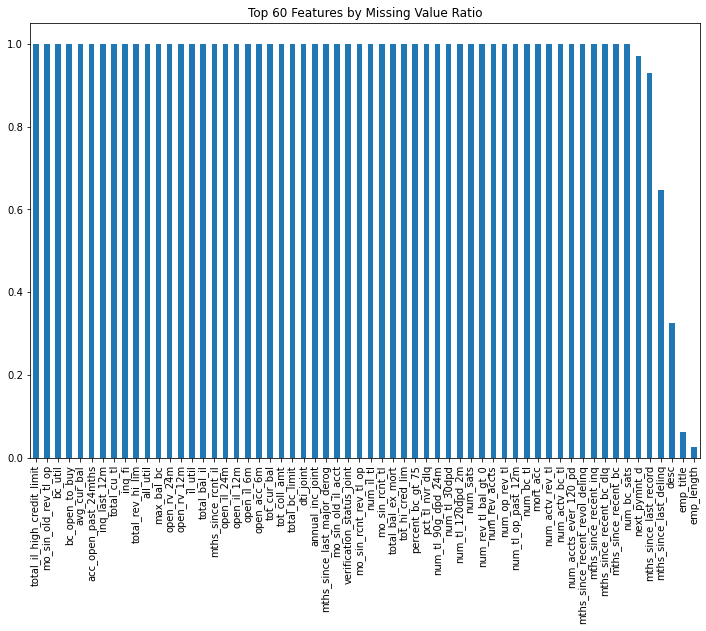

In [5]:
missing_ratio = loan_df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
missing_ratio[missing_ratio>0].head(60).plot(kind='bar')
plt.title("Top 60 Features by Missing Value Ratio")
plt.show()

This graph displays the top 60 features in the loan dataset ranked by their proportion of missing values. By visualizing the missing value ratios, it highlights which columns have the most incomplete data. This insight is essential for guiding data cleaning decisions and ensuring that subsequent analysis and modeling are based on reliable features.


### Dropping Columns with Excessive Missing Values

In our loan dataset, some columns have a very high number of missing values. To ensure our analysis and models are robust, we dropped any column with more than 25,000 missing values (out of 39,717 rows). This keeps only columns with enough data to be useful.

**Why is this important?**

- Columns with too many missing values provide little information and can harm model performance.
- Removing them helps us focus on reliable features and simplifies preprocessing.

**Example:**
If a column like `mths_since_last_delinq` had 35,000 missing values, it would be dropped. Columns like `loan_amnt` (with few or no missing values) are kept.


In [6]:
# Drop columns with more than 25,000 missing values
threshold = 25000
cols_to_drop = loan_df.columns[loan_df.isnull().sum() > threshold]
loan_df = loan_df.drop(columns=cols_to_drop)
print("Remaining columns:", loan_df.shape[1])

Remaining columns: 54


In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

The `.info()` method shows the summary statistics of the dataset’s structure, including each column’s name, data type, and the count of non-null values. This provides a quick overview of how the data is organized and the types of variables available for analysis.


In [8]:
# Summary stats and frequency counts reveal the ranges, central tendencies,
# and anomalies in the dataset.

print("\nNumerical Summary:\n", loan_df.describe().T.head())
print("\nCategorical Summary (top 5 columns):\n")

for col in loan_df.select_dtypes(include='object').columns[:4]:
    print(col, "\n", loan_df[col].value_counts().head(), "\n")


Numerical Summary:
                    count           mean            std      min       25%  \
id               39717.0  683131.913060  210694.132915  54734.0  516221.0   
member_id        39717.0  850463.559408  265678.307421  70699.0  666780.0   
loan_amnt        39717.0   11219.443815    7456.670694    500.0    5500.0   
funded_amnt      39717.0   10947.713196    7187.238670    500.0    5400.0   
funded_amnt_inv  39717.0   10397.448868    7128.450439      0.0    5000.0   

                      50%        75%        max  
id               665665.0   837755.0  1077501.0  
member_id        850812.0  1047339.0  1314167.0  
loan_amnt         10000.0    15000.0    35000.0  
funded_amnt        9600.0    15000.0    35000.0  
funded_amnt_inv    8975.0    14400.0    35000.0  

Categorical Summary (top 5 columns):

term 
  36 months    29096
 60 months    10621
Name: term, dtype: int64 

int_rate 
 10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
Name: int_rate, dtype:

For numerical variables, `.describe()` highlights the ranges, averages, and spread of values, helping identify central tendencies and possible anomalies. For categorical variables, frequency counts display the most common categories, giving insight into how values are distributed across features such as loan term, interest rate, and grade.


## Exploratory Data Analysis (EDA)

In this section, we will perform an in-depth analysis of the dataset to identify trends, patterns, and potential issues. EDA helps us understand the relationships between variables and the target, and guides feature engineering and model selection.

**Key EDA Steps:**

- Univariate analysis: Distribution of key features (loan amount, term, interest rate, etc.)
- Bivariate analysis: Relationship between features and loan status.
- Missing values and outlier detection.
- Correlation analysis.
- Class balance for the target variable.

Let's start by visualizing the distributions and relationships in the data.


### Univariate Analysis: Distribution of Key Features


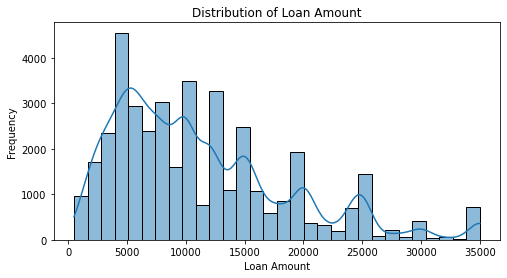

In [9]:
# Plot distribution of loan amount
plt.figure(figsize=(8,4))
sns.histplot(loan_df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


The histogram above shows how loan amounts are distributed among applicants in our dataset. Most loans are for smaller amounts, with fewer loans as the amount increases. The blue curve (KDE) highlights the overall shape, which is right-skewed—many small loans and a few large ones.

- **Most common loan amounts:** The majority of borrowers request modest loan amounts, typical for microfinance and digital lending.
- **Outliers:** There are a few very large loans, but these are rare.
- **Business insight:** This pattern helps lenders understand demand and set appropriate loan limits or target specific segments.

Understanding this distribution is important for feature engineering, detecting outliers, and making business decisions.


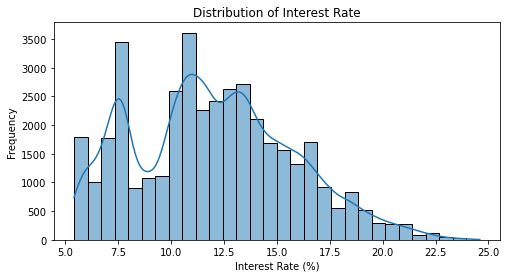

In [10]:
# Plot distribution of interest rate
plt.figure(figsize=(8,4))
sns.histplot(loan_df['int_rate'].str.rstrip('%').astype(float), bins=30, kde=True)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

This histogram shows the spread of interest rates offered to borrowers. Most loans have interest rates clustered around certain values, with fewer loans at very high or very low rates.

- **Typical rates:** The majority of loans fall within a moderate interest rate range, reflecting lender policies and borrower risk profiles.
- **Business insight:** Understanding interest rate distribution helps lenders set competitive rates and identify risk segments.
- **Modeling:** Interest rate is a key feature for predicting loan approval and risk.


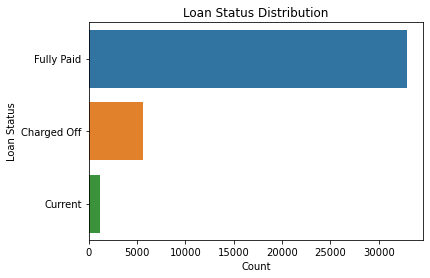

In [11]:
# Plot class balance for loan_status
plt.figure(figsize=(6,4))
sns.countplot(y='loan_status', data=loan_df, order=loan_df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

This bar chart shows the distribution of loan outcomes in the dataset. Most loans are fully paid, a smaller portion are charged off (defaults), and only a few fall into other categories.

- **Class balance:** Fully paid loans dominate, while defaults make up a much smaller share.

- **Business insight:** The imbalance highlights that defaults are relatively rare events, but they carry high financial impact, making accurate prediction critical.

- **Modeling:** Because the dataset is imbalanced, we will need to apply techniques such as class weighting or specialized evaluation metrics (e.g., PR-AUC, F1-score) to ensure the model effectively identifies defaults.

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
Name: purpose, dtype: int64


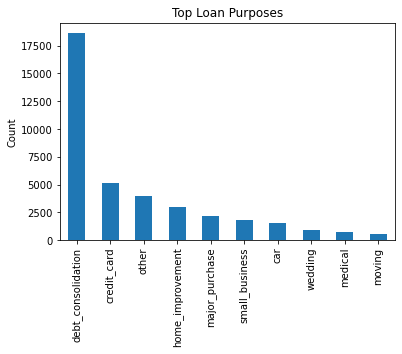

In [12]:
# Top purposes (why people borrow)
if "purpose" in loan_df.columns:
    print(loan_df["purpose"].value_counts().head(10))
    (loan_df["purpose"]
     .value_counts()
     .head(10)
     .plot(kind="bar", title="Top Loan Purposes"))
    plt.ylabel("Count")
    plt.show()


This bar chart shows the most common purposes for which borrowers request loans. Debt consolidation is by far the leading purpose, followed by credit card refinancing and other personal uses, while categories like medical expenses and moving are less frequent.

- **Most common purposes:** Debt consolidation dominates, accounting for nearly half of all loans, with credit card refinancing and home improvement also popular.

- **Business insight:** Lenders can see that a majority of demand comes from borrowers looking to manage existing debt, which may signal higher underlying risk.

- **Modeling:** Loan purpose is an important categorical feature, as different purposes are associated with different risk profiles and default probabilities


RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


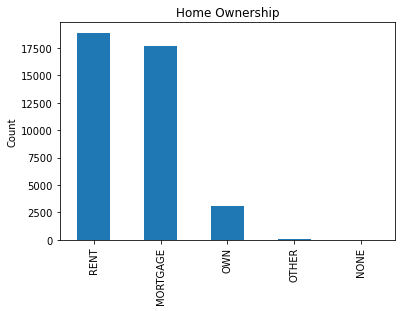

In [13]:
# Home ownership categories
if "home_ownership" in loan_df.columns:
    print(loan_df["home_ownership"].value_counts())
    (loan_df["home_ownership"]
     .value_counts()
     .plot(kind="bar", title="Home Ownership"))
    plt.ylabel("Count")
    plt.show()

This bar chart shows the distribution of borrowers by home ownership status. Most borrowers either rent or have a mortgage, while fewer own their homes outright, and very few fall into the “Other” or “None” categories.

- **Most common categories:** Renting and mortgages dominate, making up the vast majority of borrowers.

- **Business insight:** Borrowers with mortgages may have more financial stability than renters, while those who own outright represent a smaller but potentially lower-risk group.

- **Modeling:** Home ownership is a valuable categorical feature, as it often correlates with borrower stability and repayment ability.


### Bivariate Analysis: Relationship with Target


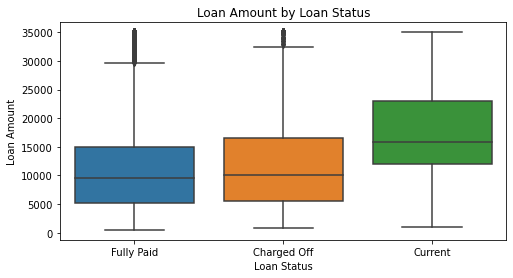

In [14]:
# Boxplot of loan amount by loan status
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

The boxplot above compares loan amounts for approved versus not approved loans. Typically, approved loans may have different amount distributions than those not approved.

- **Business insight:** Lenders can observe if higher loan amounts are riskier or less likely to be approved, helping set lending limits and risk policies.
- **Modeling:** This relationship is important for feature selection and understanding how loan amount influences approval outcomes.


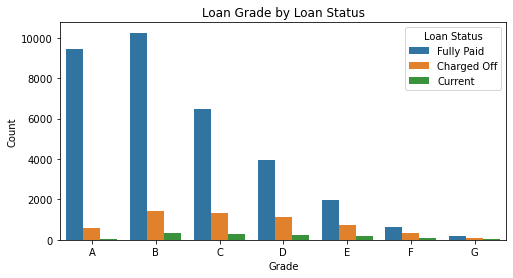

In [15]:
# Countplot of grade by loan status
plt.figure(figsize=(8,4))
sns.countplot(x='grade', hue='loan_status', data=loan_df, order=sorted(loan_df['grade'].dropna().unique()))
plt.title('Loan Grade by Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

The countplot shows how loan grades (creditworthiness) relate to loan approval status. Certain grades may be associated with higher approval rates.

- **Business insight:** Lenders can identify which grades are most likely to be approved, guiding credit policy and applicant targeting.
- **Modeling:** Grade is a strong predictor of loan approval and should be carefully considered in model development.


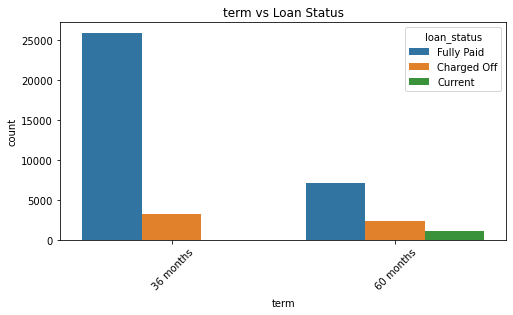

In [16]:
# Understanding how features relate to loan approval can guide feature selection.
num_cols = loan_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = loan_df.select_dtypes(include='object').columns

# Example categorical relationship
if 'loan_status' in loan_df.columns:
    for col in cat_cols[:1]:
        plt.figure(figsize=(8,4))
        sns.countplot(data=loan_df, x=col, hue='loan_status')
        plt.title(f"{col} vs Loan Status")
        plt.xticks(rotation=45)
        plt.show()

The countplot shows how loan term (length of repayment period) relates to loan status. Shorter-term loans may be associated with different repayment outcomes compared to longer-term loans.

- Business insight: Lenders can use repayment term as an indicator of risk, adjusting interest rates or policies depending on whether a borrower chooses a 36-month or 60-month loan.

- Modeling: Loan term provides useful signal for predicting default risk and should be included as a categorical feature in the model.


These bivariate analyses help us understand how key features interact with the target variable, guiding both business strategy and model design.


### Missing Values and Correlation Analysis


Columns with missing values:
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
dtype: int64


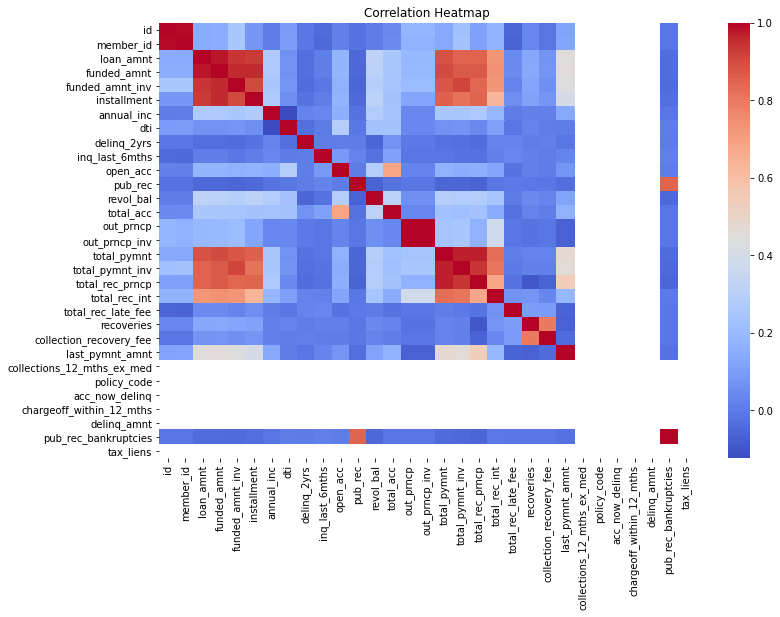

In [17]:
# Check missing values
missing = loan_df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print('Columns with missing values:')
print(missing)

# Correlation heatmap for numeric features
plt.figure(figsize=(12,8))
numeric_cols = loan_df.select_dtypes(include=['float64', 'int64']).columns
corr = loan_df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Heatmap:

The correlation heatmap above visualizes relationships between numeric features in our loan dataset. Each cell shows how strongly two features are related, with red indicating a strong positive correlation and blue a strong negative correlation.

- **Business insight:** Features with high correlation (e.g., loan amount and annual income) may reflect underlying business logic—borrowers with higher incomes tend to request larger loans.
- **Modeling:** Highly correlated features can impact model performance due to multicollinearity. It's important to identify these relationships to avoid redundancy and improve model interpretability.
- **Feature selection:** Features with little or no correlation to the target may be less useful for prediction, while those with strong correlation can be prioritized.
  This analysis helps us understand which variables move together and guides both business decisions and model design.


## Feature Engineering


### Data Preprocessing for Modeling


In [18]:
# Simplify target: Approved = 1, Not Approved = 0
loan_df['loan_status_bin'] = loan_df['loan_status'].apply(lambda x: 1 if x in ['Fully Paid'] else 0)

# Select features 
features = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']
df_model = loan_df[features + ['loan_status_bin']].copy()

# Convert int_rate to float
if df_model['int_rate'].dtype == 'O':
    df_model['int_rate'] = df_model['int_rate'].str.rstrip('%').astype(float)

# Encode categorical variables
for col in ['term', 'grade', 'emp_length', 'home_ownership', 'purpose']:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Train-test split
X = df_model.drop('loan_status_bin', axis=1)
y = df_model['loan_status_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Simplify target:

  - Creates a new binary column loan_status_bin where approved loans ('Fully Paid') are labeled as 1, and all others as 0.
  - This simplifies the target variable for binary classification.

- Select features:

  - Chooses relevant columns for modeling: loan_amnt, term, int_rate, grade, emp_length, home_ownership, annual_inc, and purpose.
  - Copies these features, along with the new target, into a new DataFrame df_model.

- Convert interest rate to float:

  - Checks if the int_rate column is stored as a string (object type).
  - Removes the percent sign and converts the values to float for numerical analysis.

- Encode categorical variables:

  - Applies label encoding to categorical columns: term, grade, emp_length, home_ownership, and purpose.
  - Converts text categories into numeric codes suitable for machine learning algorithms.

- Train-test split:

  - Separates the features (X) and target (y).
  - Splits the data into training and testing sets (80% train, 20% test) to enable model training and evaluation.


### Class Imbalance

In our loan dataset, the number of approved and not approved loans is not evenly distributed, which can lead to a model that is biased toward the majority class.

To address this, we apply the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to the training data. SMOTE generates synthetic samples for the minority class, resulting in a balanced distribution of approved and not approved loans in the training set.

This step helps ensure that the model learns equally from both classes, improving fairness and predictive performance.


In [19]:
#Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) 
print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train==0)))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before SMOTE, counts of label '1': 26362
Before SMOTE, counts of label '0': 5411 

After SMOTE, counts of label '1': 26362
After SMOTE, counts of label '0': 26362


In [20]:
# Creating new ratio features

# Loan-to-Income Ratio
df_model['loan_income_ratio'] = df_model['loan_amnt'] / (df_model['annual_inc'] + 1e-6)

# If you have a 'dti' (debt-to-income) column in your original data, you can add it as well:
if 'dti' in loan_df.columns:
    df_model['dti'] = loan_df['dti']

# Preview new features
df_model[['loan_amnt', 'annual_inc', 'loan_income_ratio']].head()

,loan_amnt,annual_inc,loan_income_ratio
0,5000,24000.0,0.208333
1,2500,30000.0,0.083333
2,2400,12252.0,0.195886
3,10000,49200.0,0.203252
4,3000,80000.0,0.037500


To enhance feature representation, a loan-to-income ratio is introduced, reflecting the proportion of the loan amount relative to the applicant’s annual income. If available, the debt-to-income (DTI) ratio from the original dataset is also included, as it is a key indicator of a borrower's credit risk. Previewing these features ensures their accuracy and readiness for subsequent modeling steps.


In [21]:
# Removing  outliers

def cap_outliers(df, col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)
    return df

for col in ['loan_amnt', 'annual_inc', 'loan_income_ratio']:
    if col in df_model.columns:
        df_model = cap_outliers(df_model, col)

# Check the effect of capping
df_model[['loan_amnt', 'annual_inc', 'loan_income_ratio']].describe()

,loan_amnt,annual_inc,loan_income_ratio
count,39717.000000,39717.000000,39717.000000
mean,11221.149004,67249.650361,0.187366
std,7454.352273,38854.556841,0.114205
min,1200.000000,14400.000000,0.022222
25%,5500.000000,40404.000000,0.100000
50%,10000.000000,59000.000000,0.166102
75%,15000.000000,82300.000000,0.251311
max,35000.000000,234999.360000,0.521043


To improve data quality and reduce the impact of extreme values, outliers in key numerical features are capped. For each selected column (loan_amnt, annual_inc, and loan_income_ratio), values below the 1st percentile and above the 99th percentile are replaced with the respective threshold values. This approach helps stabilize the distribution of these features, making the dataset more robust for modeling and reducing the influence of anomalies on model performance. The summary statistics after capping confirm that the feature ranges are now more consistent and less affected by outliers.
